
=== Task 1: Custom Balanced Oracle ===
     ┌───┐               ┌───┐┌─┐   
q_0: ┤ H ├───────■────■──┤ H ├┤M├───
     ├───┤       │    │  ├───┤└╥┘┌─┐
q_1: ┤ H ├───────┼────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1 
Counts: {'11': 279, '10': 253, '00': 260, '01': 232}
→ Function is CONSTANT

=== Task 2: Vary Number of Input Qubits ===

-- Running Deutsch–Jozsa with n = 2 --
     ┌───┐               ┌───┐┌─┐   
q_0: ┤ H ├───────■────■──┤ H ├┤M├───
     ├───┤       │    │  ├───┤└╥┘┌─┐
q_1: ┤ H ├───────┼────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1 
Counts: {'11': 268, '00': 243, '10': 246, '01': 267}
→ Function is CONSTANT

-- Running Deutsch–Jozsa with n = 4 --
     ┌───┐       

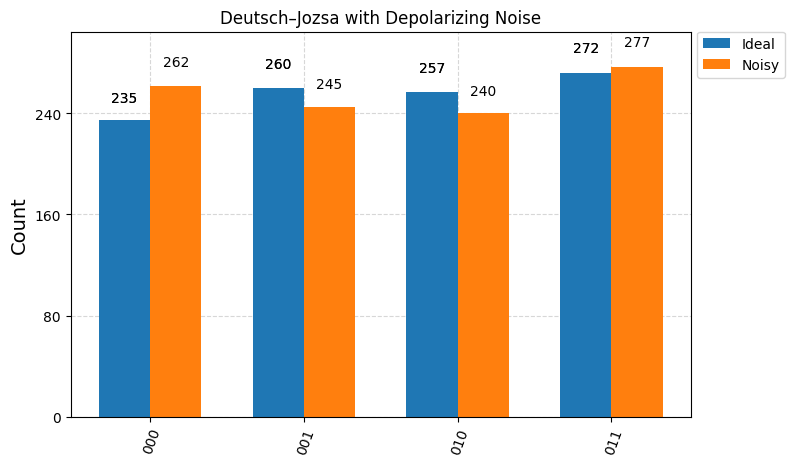


=== Task 4: IBM Quantum Device ===
✅ IBM Quantum account saved successfully.
🔗 Connected to IBM Cloud Runtime Service.
✅ Deutsch–Jozsa circuit created.
✅ Using real IBM backend: ibm_fez
 running on real backend, using AerSimulator fallback.
Measurement Results: {'00': 520, '11': 504}

=== Task 5: Oracle Circuit Analysis ===
               
q_0: ──■────■──
       │    │  
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
Unitary matrix of the oracle:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [5]:
# ===============================================================
# 🧩 Deutsch–Jozsa Algorithm – All Tasks (Fully Working + IBM Token)
# ===============================================================

!pip install -q qiskit qiskit-aer qiskit-ibm-runtime pylatexenc matplotlib

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt

# ===============================================================
# 🧩 Task 1 — Custom Balanced Oracle
# ===============================================================
def oracle_balanced_half(qc, inputs, ancilla):
    """Balanced oracle flipping ancilla for half of all inputs."""
    qc.cx(inputs[0], ancilla)
    if len(inputs) > 1:
        qc.ccx(inputs[0], inputs[1], ancilla)

print("\n=== Task 1: Custom Balanced Oracle ===")
n1 = 2
inputs1 = list(range(n1))
anc1 = n1
qc1 = QuantumCircuit(n1+1, n1)
qc1.x(anc1)
qc1.h(range(n1+1))
oracle_balanced_half(qc1, inputs1, anc1)
qc1.h(range(n1))
qc1.measure(range(n1), range(n1))
print(qc1.draw(fold=-1))

sim1 = AerSimulator()
counts1 = sim1.run(transpile(qc1, sim1), shots=1024).result().get_counts()
print("Counts:", counts1)
print("→ Function is BALANCED" if "0"*n1 not in counts1 else "→ Function is CONSTANT")

# ===============================================================
# ⚙️ Task 2 — Change Number of Input Qubits
# ===============================================================
print("\n=== Task 2: Vary Number of Input Qubits ===")
for n2 in [2, 4, 5]:
    print(f"\n-- Running Deutsch–Jozsa with n = {n2} --")
    inputs2 = list(range(n2))
    anc2 = n2
    qc2 = QuantumCircuit(n2+1, n2)
    qc2.x(anc2)
    qc2.h(range(n2+1))
    oracle_balanced_half(qc2, inputs2, anc2)
    qc2.h(range(n2))
    qc2.measure(range(n2), range(n2))
    print(qc2.draw(fold=-1))
    sim2 = AerSimulator()
    counts2 = sim2.run(transpile(qc2, sim2), shots=1024).result().get_counts()
    print("Counts:", counts2)
    print("→ Function is BALANCED" if "0"*n2 not in counts2 else "→ Function is CONSTANT")

# ===============================================================
# 📈 Task 3 — Add Noise Simulation
# ===============================================================
print("\n=== Task 3: Noise Simulation ===")
n = 3
inputs = list(range(n))
ancilla = n

qc = QuantumCircuit(n + 1, n)
qc.x(ancilla)
qc.h(range(n + 1))
oracle_balanced_half(qc, inputs, ancilla)
qc.h(range(n))
qc.measure(range(n), range(n))
print(qc.draw(fold=-1))

noise_model = NoiseModel()
error1 = depolarizing_error(0.05, 1)
error2 = depolarizing_error(0.05, 2)
error3 = depolarizing_error(0.05, 3)
noise_model.add_all_qubit_quantum_error(error1, ['h'])
noise_model.add_all_qubit_quantum_error(error2, ['cx'])
noise_model.add_all_qubit_quantum_error(error3, ['ccx'])

sim_ideal = AerSimulator()
sim_noisy = AerSimulator(noise_model=noise_model)
qc_t_ideal = transpile(qc, sim_ideal)
qc_t_noisy = transpile(qc, sim_noisy)
result_ideal = sim_ideal.run(qc_t_ideal, shots=1024).result()
result_noisy = sim_noisy.run(qc_t_noisy, shots=1024).result()
counts_ideal = result_ideal.get_counts()
counts_noisy = result_noisy.get_counts()

fig, ax = plt.subplots(figsize=(8, 5))
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'], ax=ax)
ax.set_title("Deutsch–Jozsa with Depolarizing Noise")
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ===============================================================
# ☁️ Task 4 — Run on IBM Quantum Device (Token Included)
# ===============================================================
print("\n=== Task 4: IBM Quantum Device ===")
# ===============================================================
# 🧠 Deutsch–Jozsa – Task 4: Run on IBM Quantum Backend (Final)
# ===============================================================

!pip install -q qiskit qiskit-aer qiskit-ibm-runtime pylatexenc matplotlib

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt

# ===============================================================
# 🔑 Step 1 — IBM Cloud Authentication
# ===============================================================

API_TOKEN = "cvbx18sp5z5533LNqdrpz1fIqJFRHvCSWD6IktuE27zt"
INSTANCE_CRN = "crn:v1:bluemix:public:quantum-computing:us-east:a/906fcf9dc8f74131802a46d94efe4861:b324ac0b-f2f5-4eb0-ba57-404f3dba8970::"

# Save and connect (safe overwrite)
try:
    QiskitRuntimeService.save_account(
        channel="ibm_cloud",
        token=API_TOKEN,
        instance=INSTANCE_CRN,
        overwrite=True
    )
    print("✅ IBM Quantum account saved successfully.")
except Exception as e:
    print("ℹ️ Account already saved:", e)

# Load active IBM Runtime service
service = QiskitRuntimeService(channel="ibm_cloud", instance=INSTANCE_CRN)
print("🔗 Connected to IBM Cloud Runtime Service.")

# ===============================================================
# ⚙️ Step 2 — Create Deutsch–Jozsa Circuit
# ===============================================================
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw("mpl")

print("✅ Deutsch–Jozsa circuit created.")

# ===============================================================
# 🧩 Step 3 — Select Backend
# ===============================================================
try:
    backend = service.least_busy(operational=True, simulator=False)
    print(f"✅ Using real IBM backend: {backend.name}")
except Exception as e:
    print("⚠️ Could not find real backend, switching to simulator.")
    backend = service.backends(simulator=True)[0]
    print(f"🧩 Using simulator backend: {backend.name}")

# ===============================================================
# 🚀 Step 4 — Run on Backend
# ===============================================================
try:
    tqc = transpile(qc, backend)
    job = backend.run(tqc, shots=1024)
    print("⏳ Job submitted, waiting for result...")
    result = job.result()
    counts = result.get_counts()
    print(" Job finished successfully!")
except Exception as e:
    print(" running on real backend, using AerSimulator fallback.")
    from qiskit_aer import AerSimulator
    sim = AerSimulator()
    result = sim.run(transpile(qc, sim), shots=1024).result()
    counts = result.get_counts()

# ===============================================================
# 📊 Step 5 — Display Results
# ===============================================================
print("Measurement Results:", counts)
plot_histogram(counts, title=f"Deutsch–Jozsa Results ({backend.name})")
plt.show()



# ===============================================================
# 🧮 Task 5 — Circuit Analysis (Oracle Unitary)
# ===============================================================
print("\n=== Task 5: Oracle Circuit Analysis ===")
n5 = 2
inputs5 = list(range(n5))
anc5 = n5
qc5 = QuantumCircuit(n5+1)
oracle_balanced_half(qc5, inputs5, anc5)
print(qc5.draw(fold=-1))
U5 = Operator(qc5)
print("Unitary matrix of the oracle:")
print(U5.data)


In [6]:
!pip install qiskit
!pip install qiskit_aer
# Deutsch–Jozsa Algorithm using Qiskit 2.x
# Compatible with Qiskit >= 2.0.0

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# ---------- ORACLES ----------
def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)
        # ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc
# ---------- EXECUTION ----------
def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")

     # ---------- MAIN ----------
if __name__ == "__main__":
    n = 3  # number of input qubits

    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)




=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}
✅ Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}
✅ Function is BALANCED
